In [1]:
!pip install textblob

In [2]:
# Step 1: Import Required Libraries
# Step 1: Import Required Libraries
import pandas as pd  # For data manipulation
import numpy as np  # For numerical operations
import re  # For regular expressions and text cleaning
import nltk  # Natural Language Toolkit for text processing
from nltk.corpus import stopwords  # Stopwords list
from nltk.stem import WordNetLemmatizer  # Lemmatization
from sklearn.feature_extraction.text import TfidfVectorizer  # Feature extraction
from sklearn.model_selection import train_test_split  # Splitting dataset
from sklearn.naive_bayes import MultinomialNB  # Naive Bayes classifier
from sklearn.metrics import classification_report, confusion_matrix  # Evaluation metrics
from textblob import TextBlob  # Sentiment analysis
import seaborn as sns # Visualization
import matplotlib.pyplot as plt  
from nltk.tokenize import word_tokenize

# Download necessary NLTK resources

nltk.download(['stopwords', 'wordnet', 'punkt', 'punkt_tab'])


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lbt99\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\lbt99\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lbt99\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\lbt99\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

# Data Exploration and Preprocessing

In [4]:
# Data Loading and Exploration
# Load dataset containing blog posts and their respective categories
# Assumes a CSV file with columns: 'Data' (text) and 'Labels' (category)
df = pd.read_csv('blogs.csv')
df

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism
...,...,...
1995,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,talk.religion.misc
1996,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc
1997,Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...,talk.religion.misc
1998,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc


In [5]:
# finding number of rows and columns
print(df.shape)


(2000, 2)


In [6]:
# looking for null values 
print(df.isnull())

       Data  Labels
0     False   False
1     False   False
2     False   False
3     False   False
4     False   False
...     ...     ...
1995  False   False
1996  False   False
1997  False   False
1998  False   False
1999  False   False

[2000 rows x 2 columns]


In [7]:
# total null values
print(df.isnull().sum())

Data      0
Labels    0
dtype: int64


In [8]:
# finding number of unique values in each column
print(df.nunique())

Data      2000
Labels      20
dtype: int64


In [9]:
print(df['Labels'].value_counts())

Labels
alt.atheism                 100
comp.graphics               100
talk.politics.misc          100
talk.politics.mideast       100
talk.politics.guns          100
soc.religion.christian      100
sci.space                   100
sci.med                     100
sci.electronics             100
sci.crypt                   100
rec.sport.hockey            100
rec.sport.baseball          100
rec.motorcycles             100
rec.autos                   100
misc.forsale                100
comp.windows.x              100
comp.sys.mac.hardware       100
comp.sys.ibm.pc.hardware    100
comp.os.ms-windows.misc     100
talk.religion.misc          100
Name: count, dtype: int64


In [10]:
# Text preprocessing function
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenization
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)

# Apply preprocessing to the dataset
df['cleaned_text'] = df['Data'].apply(preprocess_text)

# Display processed data
df

,Data,Labels,cleaned_text
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,path cantaloupesrvcscmuedumagnesiumclubcccmued...
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism,newsgroups altatheism path cantaloupesrvcscmue...
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism,path cantaloupesrvcscmuedudasnewsharvardedunoc...
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,path cantaloupesrvcscmuedumagnesiumclubcccmued...
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism,xref cantaloupesrvcscmuedu altatheism talkreli...
...,...,...,...
1995,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,talk.religion.misc,xref cantaloupesrvcscmuedu talkabortion altath...
1996,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc,xref cantaloupesrvcscmuedu talkreligionmisc ta...
1997,Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...,talk.religion.misc,xref cantaloupesrvcscmuedu talkorigins talkrel...
1998,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc,xref cantaloupesrvcscmuedu talkreligionmisc al...


In [11]:
# Feature Extraction with TF-IDF
# Convert text data into numerical features using TF-IDF vectorization
tfidf = TfidfVectorizer(
    max_features=5000,  # Limit vocabulary size to 5000 most common words
    ngram_range=(1, 2), # Include unigrams and bigrams for richer features
    min_df=5,           # Ignore words appearing in fewer than 5 documents
    max_df=0.7          # Ignore words appearing in more than 70% of documents
)

# Transform the cleaned text into TF-IDF features
X = tfidf.fit_transform(df['cleaned_text'])
# Extract target labels
y = df['Labels']

# Naive Bayes Model for Text Classification

In [13]:
# Train-Test Split
# Split the dataset into training and test sets (75% train, 25% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,    # 25% of data for testing
    stratify=y,        # Preserve the proportion of categories in both sets
    random_state=42    # Ensures reproducibility
)


In [14]:
#  Naive Bayes Classifier
# Initialize Naive Bayes classifier with smoothing parameter alpha=0.1
nb_classifier = MultinomialNB(alpha=0.1)
# Train the model on training data
nb_classifier.fit(X_train, y_train)

MultinomialNB(alpha=0.1)

In [15]:
# Model Evaluation
# Predict categories for the test set
y_pred = nb_classifier.predict(X_test)

# Print classification performance metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Print confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
                          precision    recall  f1-score   support

             alt.atheism       0.87      0.80      0.83        25
           comp.graphics       0.88      0.92      0.90        25
 comp.os.ms-windows.misc       0.88      0.92      0.90        25
comp.sys.ibm.pc.hardware       0.73      0.88      0.80        25
   comp.sys.mac.hardware       0.91      0.84      0.88        25
          comp.windows.x       0.95      0.84      0.89        25
            misc.forsale       0.96      0.92      0.94        25
               rec.autos       0.91      0.84      0.88        25
         rec.motorcycles       0.92      0.96      0.94        25
      rec.sport.baseball       1.00      1.00      1.00        25
        rec.sport.hockey       1.00      1.00      1.00        25
               sci.crypt       1.00      1.00      1.00        25
         sci.electronics       0.84      0.84      0.84        25
                 sci.med       0.96      0.88      

# Sentiment Analysis

In [17]:
# Sentiment Analysis
def get_sentiment(text):
    """
    Function to analyze sentiment of text using TextBlob.
    Returns:
    - 'positive' for polarity > 0.1
    - 'negative' for polarity < -0.1
    - 'neutral' otherwise
    """
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0.1:
        return 'positive'
    elif analysis.sentiment.polarity < -0.1:
        return 'negative'
    else:
        return 'neutral'

# Apply sentiment analysis to the cleaned text data
df['sentiment'] = df['cleaned_text'].apply(get_sentiment)


In [18]:
# Step 9: Sentiment Distribution Analysis
# Compute overall sentiment distribution
sentiment_dist = df['sentiment'].value_counts(normalize=True)
print("\nOverall Sentiment Distribution:")
print(sentiment_dist)

# Compute sentiment distribution for each blog category
category_sentiment = pd.crosstab(df['Labels'], df['sentiment'], normalize='index')
print("\nSentiment Distribution by Category:")
print(category_sentiment)




Overall Sentiment Distribution:
sentiment
neutral     0.5755
positive    0.3390
negative    0.0855
Name: proportion, dtype: float64

Sentiment Distribution by Category:
sentiment                 negative  neutral  positive
Labels                                               
alt.atheism                   0.10     0.60      0.30
comp.graphics                 0.08     0.54      0.38
comp.os.ms-windows.misc       0.08     0.48      0.44
comp.sys.ibm.pc.hardware      0.06     0.56      0.38
comp.sys.mac.hardware         0.08     0.52      0.40
comp.windows.x                0.07     0.58      0.35
misc.forsale                  0.09     0.33      0.58
rec.autos                     0.09     0.54      0.37
rec.motorcycles               0.10     0.54      0.36
rec.sport.baseball            0.09     0.55      0.36
rec.sport.hockey              0.20     0.50      0.30
sci.crypt                     0.06     0.63      0.31
sci.electronics               0.06     0.60      0.34
sci.med             

<Figure size 1500x1000 with 0 Axes>

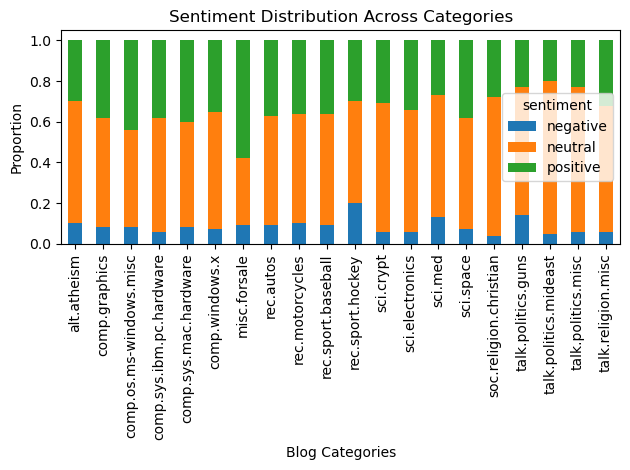

In [19]:
# Visualization of sentiment distribution across blog categories
plt.figure(figsize=(15, 10))
category_sentiment.plot(kind='bar', stacked=True)
plt.title('Sentiment Distribution Across Categories')
plt.xlabel('Blog Categories')
plt.ylabel('Proportion')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Key Observations:

1. The classification report provides precision, recall, and F1-score for each category.
2. The confusion matrix highlights category misclassifications.
3. Sentiment analysis reveals the proportion of positive, negative, and neutral posts.
4. Sentiment distribution by category indicates which topics have more emotional content.
